Task 3:
Step 1: Dataset Loading and Inspection
1. Load the dataset (Placement_Data_Full_Class.csv) into a Pandas DataFrame.
o Display the first few rows using .head() to understand the structure.
o Use .info() and .describe() to summarize the dataset.
o Identify the target variable (salary) and feature variables.
Step 2: Data Preprocessing
2. Handle Missing Data:
o Identify and handle missing or null values in the salary column and other
features.
o Explain your approach (e.g., replacing with median or removing rows).
3. Feature Engineering:
o Encode categorical variables (e.g., gender, specialization, etc.) using one-hot
encoding or label encoding.
4. Data Cleaning:
o Handle outliers in numerical columns (e.g., salary) using methods like capping or
removal.
o Normalize or standardize numerical features (if required).
Step 3: Exploratory Data Analysis (EDA)
5. Perform EDA to understand patterns in the dataset:
o Visualize the distribution of the salary column.
o Analyze relationships between features and salary using scatter plots, boxplots,
and correlation heatmaps.
o Highlight key insights from the dataset.
Step 4: Model Building
6. Data Splitting:
o Split the dataset into training (80%) and testing (20%) subsets.
7. Model Training:
o Train model.
Step 5: Model Evaluation
8. Evaluate the models on the testing set using:
o Mean Absolute Error (MAE)
o Mean Squared Error (MSE)
o Root Mean Squared Error (RMSE)
o R-squared (R²)

In [76]:
!pip install pycaret

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [77]:
df=pd.read_csv("Placement_Data_Full_Class.csv")
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


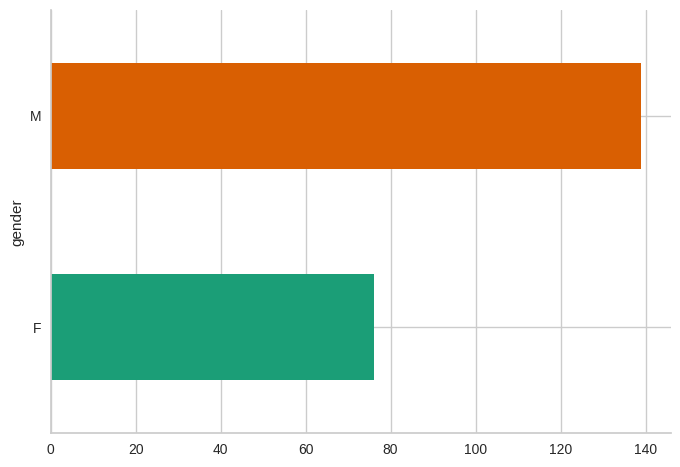

In [78]:
# @title gender

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           213 non-null    float64
 3   ssc_b           213 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           208 non-null    object 
 7   degree_p        208 non-null    float64
 8   degree_t        208 non-null    object 
 9   workex          208 non-null    object 
 10  etest_p         213 non-null    float64
 11  specialisation  213 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [80]:
df.isnull().sum()

,0
sl_no,0
gender,0
ssc_p,2
ssc_b,2
hsc_p,0
hsc_b,0
hsc_s,7
degree_p,7
degree_t,7
workex,7


In [81]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [82]:
df['salary']=df['salary'].fillna(df['salary'].mean())

In [83]:
df['salary'].isnull().sum()

0

In [84]:
df.drop(['sl_no','ssc_b','hsc_b','hsc_s','degree_t'],axis=1,inplace=True)

In [85]:
df.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,58.00,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,M,79.33,78.33,77.48,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,M,65.00,68.00,64.00,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,M,56.00,52.00,52.00,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,M,85.80,73.60,73.30,No,96.8,Mkt&Fin,55.50,Placed,425000.000000


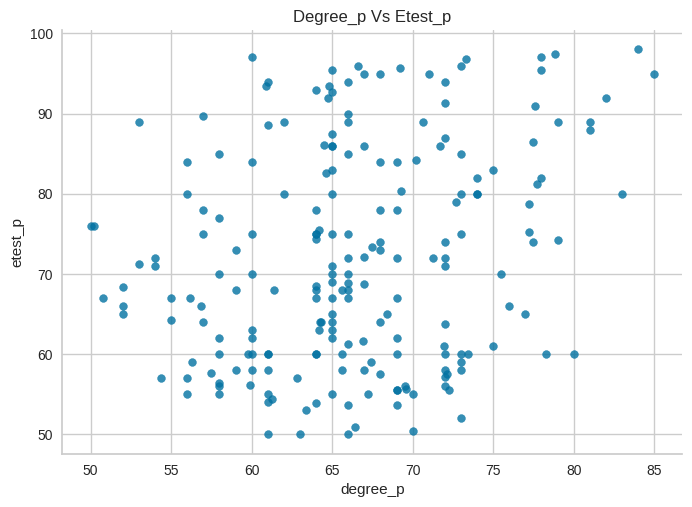

In [86]:
# @title degree_p vs etest_p

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='degree_p', y='etest_p',title='Degree_p Vs Etest_p', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Preprocessing: Encoding categorical variables

In [87]:
df['gender'] = df['gender'].astype('category').cat.codes
df['specialisation'] = df['specialisation'].astype('category').cat.codes
# data['day'] = data['day'].astype('category').cat.codes
# data['time'] = data['time'].astype('category').cat.codes

In [88]:
df.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,58.00,No,55.0,1,58.80,Placed,270000.000000
1,1,79.33,78.33,77.48,Yes,86.5,0,66.28,Placed,200000.000000
2,1,65.00,68.00,64.00,No,75.0,0,57.80,Placed,250000.000000
3,1,56.00,52.00,52.00,No,66.0,1,59.43,Not Placed,288655.405405
4,1,85.80,73.60,73.30,No,96.8,0,55.50,Placed,425000.000000


In [89]:
df['specialisation'].isnull().sum()

0

In [90]:
df.describe()

,gender,ssc_p,hsc_p,degree_p,etest_p,specialisation,mba_p,salary
count,215.000000,213.000000,215.000000,208.000000,213.000000,215.000000,215.000000,215.000000
mean,0.646512,67.409531,66.333163,66.269663,72.110892,0.432558,62.278186,288655.405405
std,0.479168,10.815114,10.897509,7.176998,13.309323,0.515063,5.833385,77457.900102
min,0.000000,40.890000,37.000000,50.000000,50.000000,-1.000000,51.210000,200000.000000
25%,0.000000,61.000000,60.900000,61.000000,60.000000,0.000000,57.945000,250000.000000
50%,1.000000,67.000000,65.000000,66.000000,71.000000,0.000000,62.000000,288655.405405
75%,1.000000,76.000000,73.000000,72.000000,84.000000,1.000000,66.255000,288655.405405
max,1.000000,89.400000,97.700000,85.000000,98.000000,1.000000,77.890000,940000.000000


# Split the data into training and test sets

In [91]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [92]:
from pycaret.regression import *

# Initialize the PyCaret regression setup without experiment logging

In [94]:
from pycaret.regression import *
regression1 = setup(df, target = 'salary', session_id=123, log_experiment=False, experiment_name='df1_regression')

,Description,Value
0,Session id,123
1,Target,salary
2,Target type,Regression
3,Original data shape,"(215, 10)"
4,Transformed data shape,"(215, 10)"
5,Transformed train set shape,"(150, 10)"
6,Transformed test set shape,"(65, 10)"
7,Numeric features,7
8,Categorical features,2
9,Rows with missing values,5.1%


In [98]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


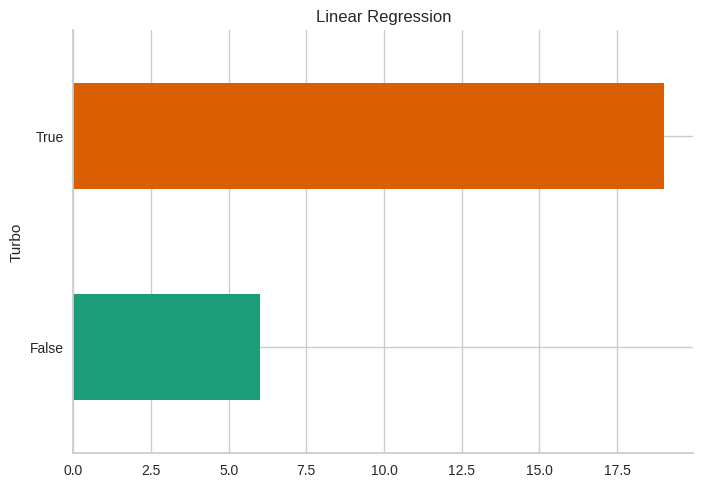

In [97]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Turbo').size().plot(kind='barh',title='Linear Regression', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Compare models to find the best one

In [99]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,33952.7854,3231547921.8463,52692.6916,-0.0203,0.1674,0.1127,0.0740
dummy,Dummy Regressor,35747.9049,3340844928.0000,54507.5465,-0.1003,0.1755,0.1241,0.0500
omp,Orthogonal Matching Pursuit,36352.5819,3301454442.1838,54367.1720,-0.1018,0.1754,0.1269,0.0490
rf,Random Forest Regressor,32986.3518,3348443144.8545,53965.9903,-0.1271,0.1711,0.1116,0.2090
br,Bayesian Ridge,36433.1303,3447575327.8865,55497.5192,-0.1468,0.1793,0.1269,0.0530
ridge,Ridge Regression,37185.3394,3519459784.4258,55129.6597,-0.1497,0.1774,0.1278,0.0500
lr,Linear Regression,37292.4199,3530034569.6525,55179.9484,-0.1516,0.1775,0.1281,0.9810
lasso,Lasso Regression,37291.4408,3529962585.0604,55179.5462,-0.1516,0.1775,0.1281,0.0750
llar,Lasso Least Angle Regression,37291.4395,3529962371.8062,55179.5446,-0.1516,0.1775,0.1281,0.0550
lar,Least Angle Regression,37384.0546,3541114175.3008,55263.3946,-0.1536,0.1777,0.1282,0.0530


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

## Comparison will test 19 Regression models

In [100]:
# Print the best model
print(best_model)

HuberRegressor()


# Tune the best model for better performance

# Optimize for Mean Absolute Error

In [101]:
tuned_model = tune_model(best_model, optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,41045.2803,5012016670.2686,70795.5978,0.0492,0.2025,0.1198
1,22457.9685,1248944350.2758,35340.4068,0.2103,0.1317,0.0863
2,33583.0604,2234992712.9006,47275.7095,-0.4434,0.1551,0.1069
3,25315.6092,1034336208.0114,32161.0977,0.4465,0.1119,0.0884
4,45298.4306,9986214159.5332,99931.0470,-0.0681,0.2427,0.1155
5,36972.0348,2421668652.6267,49210.4527,-0.5410,0.1789,0.1446
6,38431.7544,2593575416.8197,50927.1579,-0.1148,0.1782,0.1336
7,24119.4661,969451348.2035,31136.0137,-0.0250,0.1214,0.0956
8,44120.2037,5500047450.7168,74162.3048,-0.0828,0.2154,0.1253


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Finalize the model for deployment

In [102]:
final_model = finalize_model(tuned_model)

# Predict on the test dataset

In [103]:
predictions = predict_model(final_model, data=test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,38999.0084,5998231052.9303,77448.2476,-0.0267,0.2065,0.1196


In [105]:
# Extract true and predicted values
true_values = test['salary']
# Verify the actual column name in predictions
print(predictions.columns)

# Replace 'Label' with the correct column name based on the output above
predicted_values = predictions['prediction_label']  # Update 'Label' if the column name is different

Index(['gender', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p',
       'specialisation', 'mba_p', 'status', 'salary', 'prediction_label'],
      dtype='object')


# Evaluate performance

In [106]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

In [107]:
# Calculate metrics
mse = mean_squared_error(true_values, predicted_values)
r2 = r2_score(true_values, predicted_values)
mae = mean_absolute_error(true_values, predicted_values)
rmse = root_mean_squared_error(true_values, predicted_values)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 5998231051.674038
R-squared: -0.02670970708080067
Mean Absolute Error: 38999.008399982195
Root Mean Squared Error: 77448.24757006473


# Save the model for later use

In [108]:
# Save the model for later use
save_model(final_model, 'df1_regression')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['gender', 'ssc_p', 'hsc_p',
                                              'degree_p', 'etest_p',
                                              'specialisation', 'mba_p'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['workex', 'status'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['workex', 'status'],
                                     transformer=OrdinalEncoder(cols=['workex',
                                                                      'status'],
                                                                handle_missing='return_nan',
                                                                mapping=[{'co